# __Child Mortality Rate__

# To perform analysis on the dataset.

__Dataset Source:__ https://www.kaggle.com/datasets/drateendrajha/global-child-mortality-rate

### Import Packages

In [0]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df_org = spark.read.table("default.child_mortality_rate")
df_pd = df_org.toPandas()

## Sample records

In [0]:
df_pd.head()

,ID,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


## Datatype description

In [0]:
df_pd.dtypes

Out[10]: ID                           int32
Country                     object
Year                         int32
Gender                      object
Child Mortality(1 to 4)    float64
Total Population           float64
Mortality Rate             float64
dtype: object

## Rows and Columns Count

In [0]:
display(Markdown(f"The number of rows are {df_pd.shape[0]} and number of columns are {df_pd.shape[1]} in the DataFrame."))

The number of rows are 30064 and number of columns are 7 in the DataFrame.

## Get the column names

In [0]:
cols = df_pd.columns
display(Markdown("The columns in the dataset are:"))
for c in cols:
    display(Markdown(c))

The columns in the dataset are:

ID

Country

Year

Gender

Child Mortality(1 to 4)

Total Population

Mortality Rate

## Number of countries in the dataframe

In [0]:
display(Markdown(f"There are {df_pd.Country.nunique()} unique countries in the dataframe."))

There are 194 unique countries in the dataframe.

## Year details in the dataframe

In [0]:
display(Markdown(f"There are {df_pd.Year.nunique()} unique years in the dataframe."))
display(Markdown(f"The starting year in the dataframe is {df_pd.Year.unique().min()} and the ending year in the dataframe is {df_pd.Year.unique().max()}"))

There are 65 unique years in the dataframe.

The starting year in the dataframe is 1955 and the ending year in the dataframe is 2019

## Check for the presence of NULL values in the dataframe

In [0]:
df_pd.isnull().sum()

Out[91]: ID                         0
Country                    0
Year                       0
Gender                     0
Child Mortality(1 to 4)    0
Total Population           0
Mortality Rate             0
dtype: int64

## Drop NULL values

In [0]:
df_pd = df_pd.dropna()

## Number of records after *dropping NULL* values

In [0]:
df_pd.shape[0]

Out[24]: 30064

## Remove duplicate rows from the dataframe

In [0]:
df_pd = df_pd.drop_duplicates()

## Number of records after *removing duplicate* values

In [0]:
df_pd.shape[0]

Out[26]: 30064

## Mean of Mortality Rate grouping by country

Print those countries whose mean mortality lies above 40% of the min-max range.

In [0]:
mortality_rate = df_pd.groupby('Country').mean()['Mortality Rate']
mean_mortality_df = pd.DataFrame({'Country': mortality_rate.index, 'Mean Mortality Rate': mortality_rate.values})

min_mortality = mean_mortality_df['Mean Mortality Rate'].min()
max_mortality = mean_mortality_df['Mean Mortality Rate'].max()

# find the value which is 40% of the mean range
threshold = 0.4 * (max_mortality - min_mortality)

display(Markdown("Countries with mean Mortality Rate above 40% of the mean range:"))
mean_mortality_df[mean_mortality_df['Mean Mortality Rate'] > threshold].sort_values('Mean Mortality Rate', ascending=False)

Countries with mean Mortality Rate above 40% of the mean range:

,Country,Mean Mortality Rate
124,Niger,6.902688
26,Burkina Faso,5.101315
105,Mali,4.918294
155,Sierra Leone,4.237623
152,Senegal,4.112912
64,Gambia,4.031067
71,Guinea,4.022135
33,Chad,3.880512
102,Malawi,3.437973
18,Benin,3.220640


### In the "Gender" column of the data, for every country and every year, we have records for Male, Female followed by Total which is the sum of the values from "Child Mortality(1 to 4)"

Removing the records from the dataset which has **Total** as the column value in the column **Gender**.

In [0]:
df_pd_1 = df_pd[df_pd.Gender != 'Total']

In [0]:
display(Markdown(f"The number of rows in the new dataframe is {df_pd_1.shape[0]}."))

The number of rows in the new dataframe is 19848.

## Plotting data

### Show the count of records for each gender - Male and Female

Out[105]: Text(0.5, 1.0, 'Gender Counts')

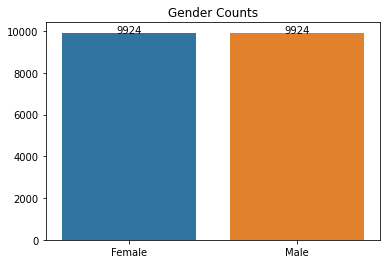

In [0]:
gender_count = df_pd_1.Gender.value_counts()

plt1 = sns.barplot(x=gender_count.index, y=gender_count.values)
for i, v in enumerate(gender_count.values):
    plt1.text(i, v+0.5, str(v), ha='center', fontsize=10)

plt1.set_title('Gender Counts')